# Tune Visualization

In order to visualize results, please install `plotly` with the following command:

  `pip install plotly`

In [1]:
import os
import pandas as pd
from ray.tune.visual_utils import load_results_to_df, generate_plotly_dim_dict
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

### Specify the directory where all your results are in the variable `RESULTS_DIR`.

In [2]:
RESULTS_DIR = '../../logs2/marketorderenv/hpsearch-ppo-3/'

In [3]:
#RESULTS_DIR = os.path.expanduser("~/ray_results")
df = load_results_to_df(RESULTS_DIR)
[key for key in df]

Importing ../../logs2/marketorderenv/hpsearch-ppo-3/PPO_MarketOrderEnv-v0_213_clip_param=0.1,entropy_coeff=0.1,gamma=0.8,lambda=0.8,lr=0.005,num_sgd_iter=5,train_batch_size=80000_2019-02-16_10-43-37nal6t1jk/result.json failed...Perhaps empty?
Traceback (most recent call last):
  File "/home/valldabo/miniconda3/envs/orderbookrl/lib/python3.6/site-packages/ray/tune/visual_utils.py", line 38, in _parse_results
    res_dict = _flatten_dict(json.loads(line.strip()))
UnboundLocalError: local variable 'line' referenced before assignment
Importing ../../logs2/marketorderenv/hpsearch-ppo-3/PPO_MarketOrderEnv-v0_215_clip_param=0.1,entropy_coeff=0.01,gamma=0.8,lambda=0.8,lr=0.005,num_sgd_iter=5,train_batch_size=80000_2019-02-16_10-44-05hpflbjfm/result.json failed...Perhaps empty?
Traceback (most recent call last):
  File "/home/valldabo/miniconda3/envs/orderbookrl/lib/python3.6/site-packages/ray/tune/visual_utils.py", line 38, in _parse_results
    res_dict = _flatten_dict(json.loads(line.strip()

['batch_mode',
 'callbacks:on_episode_end',
 'clip_param',
 'clip_rewards',
 'config:batch_mode',
 'config:callbacks:on_episode_end',
 'config:callbacks:on_episode_start',
 'config:callbacks:on_episode_step',
 'config:callbacks:on_sample_end',
 'config:callbacks:on_train_result',
 'config:clip_actions',
 'config:clip_param',
 'config:clip_rewards',
 'config:collect_metrics_timeout',
 'config:compress_observations',
 'config:entropy_coeff',
 'config:env',
 'config:env_config:max_episode_time',
 'config:env_config:max_sequence_skip',
 'config:env_config:random_start',
 'config:gamma',
 'config:grad_clip',
 'config:horizon',
 'config:input',
 'config:input_evaluation',
 'config:kl_coeff',
 'config:kl_target',
 'config:lambda',
 'config:local_evaluator_tf_session_args:inter_op_parallelism_threads',
 'config:local_evaluator_tf_session_args:intra_op_parallelism_threads',
 'config:log_level',
 'config:lr',
 'config:lr_schedule',
 'config:model:conv_activation',
 'config:model:conv_filters',
 

### Choose the fields you wish to visualize over in `GOOD_FIELDS`.

In [4]:
df.clip_param.unique()

array([0.3, 0.1])

In [5]:
df.gamma.unique()

array([0.99, 0.8 ])

In [14]:
GOOD_FIELDS = [
               'lambda',
               'entropy_coeff',
               'clip_param',
               'gamma',
               'lr',
               'custom_metrics:capital_return_mean']

visualization_df = df[GOOD_FIELDS]
visualization_df = visualization_df.dropna()
visualization_df.head()

,lambda,entropy_coeff,clip_param,gamma,lr,custom_metrics:capital_return_mean
0,0.8,0.01,0.3,0.99,0.050,-0.051476
1,0.8,0.10,0.3,0.80,0.050,-0.044440
2,0.8,0.10,0.3,0.99,0.005,-0.063075
3,0.8,0.01,0.3,0.80,0.005,-0.027739
4,0.8,0.10,0.1,0.99,0.050,-0.052448


### Enjoy.

Documentation for this Plotly visualization can be found here: https://plot.ly/python/parallel-coordinates-plot/

In [15]:
import statsmodels.api as sm

In [16]:
visualization_df.head()

,lambda,entropy_coeff,clip_param,gamma,lr,custom_metrics:capital_return_mean
0,0.8,0.01,0.3,0.99,0.050,-0.051476
1,0.8,0.10,0.3,0.80,0.050,-0.044440
2,0.8,0.10,0.3,0.99,0.005,-0.063075
3,0.8,0.01,0.3,0.80,0.005,-0.027739
4,0.8,0.10,0.1,0.99,0.050,-0.052448


In [17]:
import statsmodels.api as sm

sm.OLS(
    visualization_df['custom_metrics:capital_return_mean'],
    sm.add_constant(visualization_df[[col for col in visualization_df if col != 'custom_metrics:capital_return_mean']])
    ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     custom_metrics:capital_return_mean   R-squared:                       0.224
Model:                                            OLS   Adj. R-squared:                  0.205
Method:                                 Least Squares   F-statistic:                     11.81
Date:                                Sat, 16 Feb 2019   Prob (F-statistic):           4.87e-10
Time:                                        11:03:23   Log-Likelihood:                 132.64
No. Observations:                                 210   AIC:                            -253.3
Df Residuals:                                     204   BIC:                            -233.2
Df Model:                                           5                                         
Covariance Type:                            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0339      0.093     -0.366      0.715      -0.217       0.149
lambda           -0.0923      0.045     -2.049      0.042      -0.181      -0.003
entropy_coeff    -0.7669      0.200     -3.830      0.000      -1.162      -0.372
clip_param        0.5297      0.090      5.880      0.000       0.352       0.707
gamma            -0.0879      0.095     -0.927      0.355      -0.275       0.099
lr               -0.8767      0.401     -2.184      0.030      -1.668      -0.085
==============================================================================
Omnibus:                      109.959   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              495.156
Skew:                          -2.117   Prob(JB):                    3.01e-108
Kurtosis:                       9.217   Cond. No.                         66.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
visualization_df.sort_values(by='custom_metrics:capital_return_mean', ascending=False).head(20)

,lambda,entropy_coeff,clip_param,gamma,lr,custom_metrics:capital_return_mean
130,0.4,0.01,0.1,0.80,0.050,-0.006491
194,0.4,0.01,0.3,0.80,0.050,-0.008634
219,0.4,0.01,0.3,0.99,0.050,-0.009073
16,0.4,0.01,0.3,0.80,0.050,-0.010385
205,0.4,0.01,0.3,0.99,0.005,-0.011526
67,0.8,0.01,0.3,0.80,0.005,-0.011709
25,0.8,0.01,0.1,0.80,0.050,-0.011997
154,0.4,0.01,0.3,0.80,0.005,-0.012178
41,0.8,0.01,0.3,0.80,0.050,-0.012886
66,0.4,0.01,0.3,0.80,0.005,-0.013662


In [19]:
data = [
    go.Parcoords(
        line = dict(color = visualization_df['custom_metrics:capital_return_mean'], 
                    showscale=True,
                   colorscale = 'Jet', reversescale = True),
        dimensions = [generate_plotly_dim_dict(visualization_df, field) 
                      for field in visualization_df ],
        opacity=0.3
    )
]

plotly.offline.iplot(data)

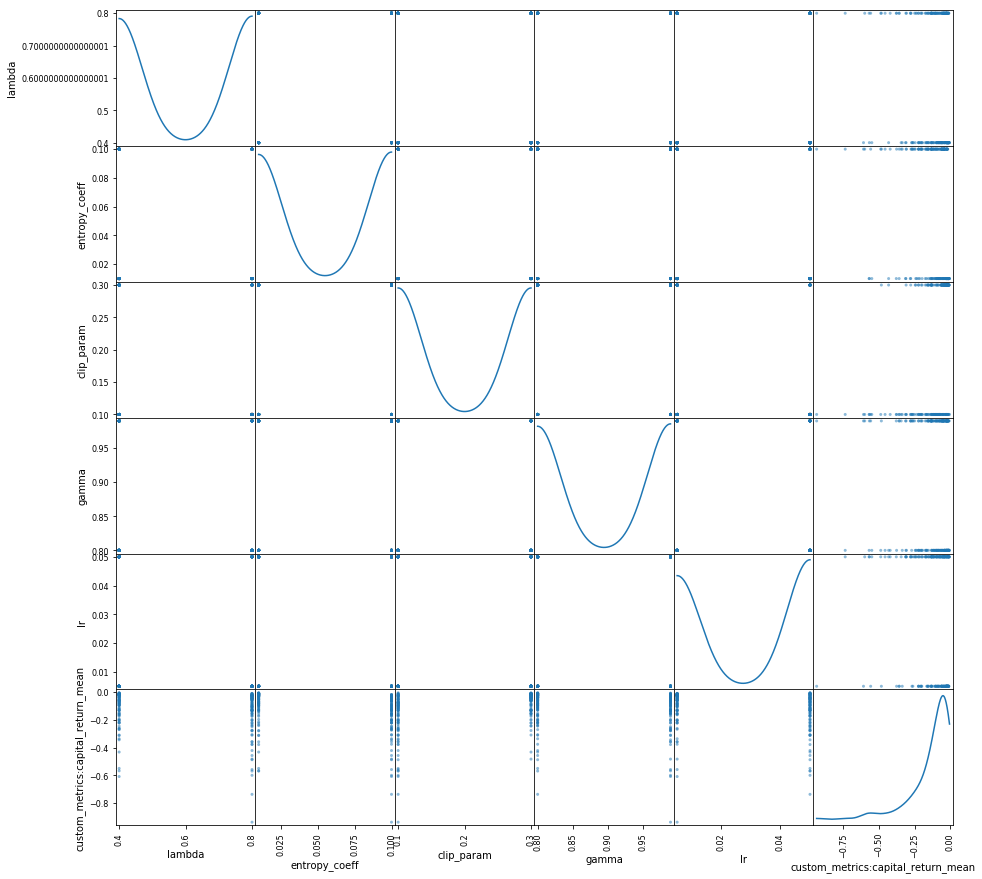

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(visualization_df, diagonal='kde', figsize=(15,15));

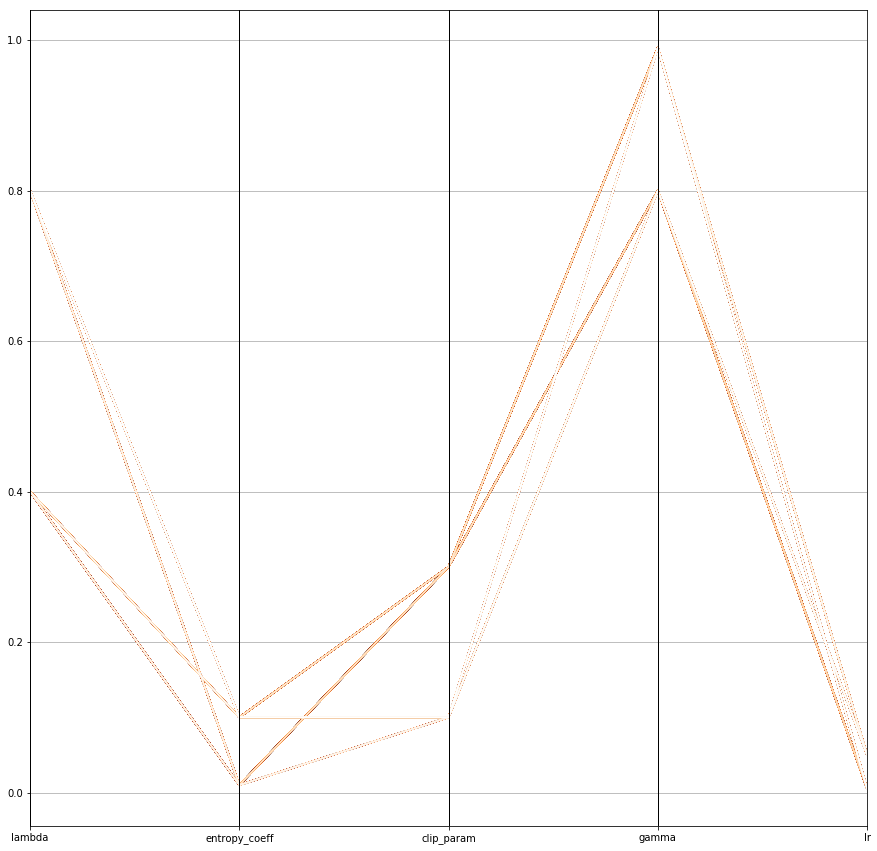

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
from pandas.plotting import parallel_coordinates

temp = visualization_df.copy(deep=True)
temp = temp.sort_values(by='custom_metrics:capital_return_mean', ascending=False)
#temp['custom_metrics:capital_return_mean'] = pd.cut(temp['custom_metrics:capital_return_mean'], 10)
colors = cm.get_cmap('gist_heat', temp['custom_metrics:capital_return_mean'].unique().size)
colors = [rgb2hex(colors(i)[:3]) for i in range(colors.N)]

fig, ax = plt.subplots(figsize=(15,15))
ax = parallel_coordinates(temp, color=colors, class_column='custom_metrics:capital_return_mean',sort_labels=False, ax=ax)
legend = ax.legend()
legend.remove()